In [1294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1295]:
df = pd.read_csv("cleveland.csv")
# df = df[df.num <= 1]
df.columns = df.columns.str.replace(' ', '')
# df.replace('?', 0, inplace=True)
# df.tail()
df.loc[(df['MajorVessels'] == '?') 
       | 
       (df['thal'] == '?')]
len(df)

303

In [1296]:
df_complete_vals = df.loc[(df['MajorVessels'] != '?') 
                       & 
                       (df['thal'] != '?')]

len(df_complete_vals)

297

In [1297]:
inputs = df_complete_vals.drop('num', axis='columns')
target = df_complete_vals['num']

In [1298]:
inputs.tail()

,Age,Sex,ChestPainType,RestingBloodPressure,SerumCholesterol,FastingBloodSugar,RestingElectrocardiographic,MaximumHeartRate,ExerciseInducedAngina,STDepression,ExerciseSlope,MajorVessels,thal
297,57,0,4,140,241,0,0,123,1,0.2,2,0,7
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3


In [1299]:
target.head()

0    0
1    2
2    1
3    0
4    0
Name: num, dtype: int64

In [1300]:
inputs.dtypes

Age                              int64
Sex                              int64
ChestPainType                    int64
RestingBloodPressure             int64
SerumCholesterol                 int64
FastingBloodSugar                int64
RestingElectrocardiographic      int64
MaximumHeartRate                 int64
ExerciseInducedAngina            int64
STDepression                   float64
ExerciseSlope                    int64
MajorVessels                    object
thal                            object
dtype: object

**Age**, **RestingBloodPressure**, **SerumCholesterol** and **MaximumHeartRate** are all numerical values. The other columns need to be inspected to make sure they only contain reasonable values, and some of them need to change. Scikit learn Decision Trees natively support continuous data, such as RestingBloodPressure and maximum heart rate, but they do not natively support categorical data, such as ChestPainType, which contains 4 different categories. In order to use categorical data with scikit learn Decision Trees, we have to convert a column of categorical data into multiple columns of binary values (One Hot Encoding).



In [1301]:
inputs_encoded = pd.get_dummies(inputs, columns=['ChestPainType', 
                                       'RestingElectrocardiographic', 
                                       'ExerciseSlope', 
                                       'thal'])
inputs_encoded.head()
# inputs_encoded.columns

,Age,Sex,RestingBloodPressure,SerumCholesterol,FastingBloodSugar,MaximumHeartRate,ExerciseInducedAngina,STDepression,MajorVessels,ChestPainType_1,...,ChestPainType_4,RestingElectrocardiographic_0,RestingElectrocardiographic_1,RestingElectrocardiographic_2,ExerciseSlope_1,ExerciseSlope_2,ExerciseSlope_3,thal_3,thal_6,thal_7
0,63,1,145,233,1,150,0,2.3,0,1,...,0,0,0,1,0,0,1,0,1,0
1,67,1,160,286,0,108,1,1.5,3,0,...,1,0,0,1,0,1,0,1,0,0
2,67,1,120,229,0,129,1,2.6,2,0,...,1,0,0,1,0,1,0,0,0,1
3,37,1,130,250,0,187,0,3.5,0,0,...,0,1,0,0,0,0,1,1,0,0
4,41,0,130,204,0,172,0,1.4,0,0,...,0,0,0,1,1,0,0,1,0,0


In [1302]:
max(inputs_encoded["MaximumHeartRate"])

202

Now we are going to transform the 4 types of heart disease into two categories ("No Heart Disease" and "Heart Disease"). This is because in the original dataset 0 means no heart disease and numbers 1 to 4 represent different types of heart disease. For the purpose of this project, we only want to know if someone is more likely to have a heart disease or not.

In [1303]:
target.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [1304]:
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
target_not_zero_index = target > 0
target[target_not_zero_index] = 1
target.unique()

array([0, 1], dtype=int64)

In [1305]:
target

0      0
1      1
2      1
3      0
4      0
      ..
297    1
298    1
299    1
300    1
301    1
Name: num, Length: 297, dtype: int64

## Train-Test Split

In [1306]:
from sklearn.model_selection import train_test_split

In [1307]:
X_train, X_test, y_train, y_test = train_test_split(inputs_encoded, target)

In [1308]:
len(X_train)

222

In [1309]:
len(X_test)

75

In [1310]:
from sklearn import tree
model = tree.DecisionTreeClassifier(min_samples_split=2, max_depth=3)

In [1311]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

## Model Accuracy

In [1312]:
# Return the mean accuracy on the given test data and labels.
model.score(X_test, y_test)

0.7866666666666666

In [1313]:
# model.predict([[63,1,1,145,233,1,2,150,0,2.3,3,0,6]])

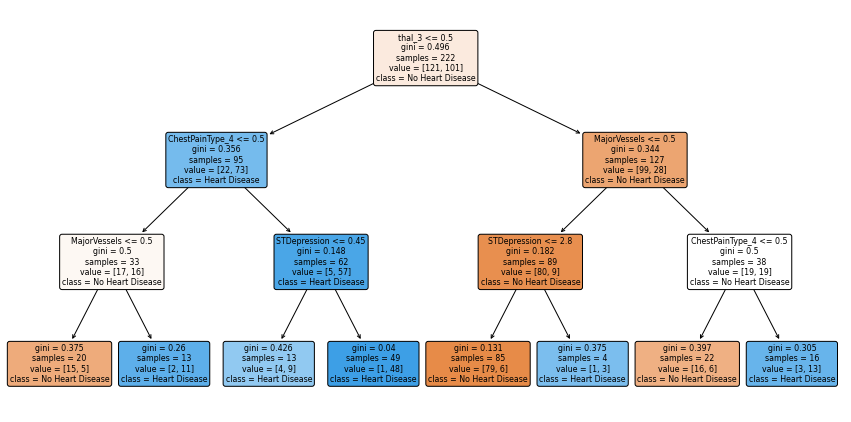

In [1314]:
fig = plt.figure(figsize=(15, 7.5))
_ = tree.plot_tree(model, 
                   feature_names=inputs_encoded.columns,
                   rounded=True,  
                   class_names=["No Heart Disease", "Heart Disease"],
                   filled=True)